In [17]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from sklearn.model_selection import train_test_split

train_file = "./data/sign_mnist_train.csv"
test_file = "./data/sign_mnist_test.csv"

# Load data
train_data = np.loadtxt(train_file, delimiter=",", skiprows=1)
test_data = np.loadtxt(test_file, delimiter=",", skiprows=1)


[[0.57647059 0.58431373 0.58823529 ... 0.49019608 0.5372549  0.53333333]
 [0.84313725 0.84705882 0.84705882 ... 0.24705882 0.23137255 0.24705882]
 [0.90588235 0.91372549 0.91764706 ... 0.98823529 0.97647059 0.96470588]
 ...
 [0.28627451 0.29019608 0.19607843 ... 0.61960784 0.61960784 0.62745098]
 [0.48235294 0.48627451 0.48627451 ... 0.64705882 0.64705882 0.64705882]
 [0.67058824 0.6745098  0.67843137 ... 0.56862745 0.63137255 0.67058824]]


In [48]:

# Split data into features and labels
targets1 = train_data[:, 0]
data1 = train_data[:, 1:]
targets2 = test_data[:, 0]
data2 = test_data[:, 1:]

X = np.append(data1, data2, axis=0)
y = np.append(targets1, targets2, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y) 

# Normalize data
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print()

### Run this cell to use PCA in all the tests

In [42]:
from sklearn.decomposition import PCA


pca = PCA(n_components=392).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


[[0.60784314 0.61568627 0.61176471 ... 0.40392157 0.52941176 0.58431373]
 [0.82745098 0.82745098 0.83137255 ... 0.87058824 0.89803922 0.63921569]
 [0.54901961 0.56862745 0.58039216 ... 0.76862745 0.76470588 0.75686275]]


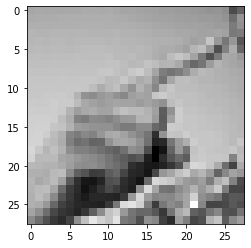

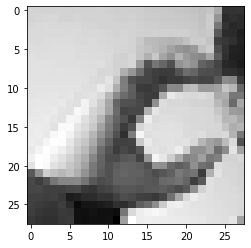

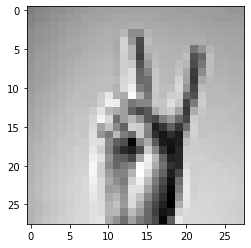

In [18]:
# display some images

# https://medium.com/the-data-science-publication/how-to-plot-mnist-digits-using-matplotlib-65a2e0cc068
# pick a sample to plot
samples = [1, 3, 90]
images = X_train[samples]
print(images)
images = [i.reshape(28, 28) for i in images]

# plot the sample
fig = plt.figure
for image in images:
    plt.imshow(image, cmap='gray')
    plt.show()

### Effects of PCA on our data:

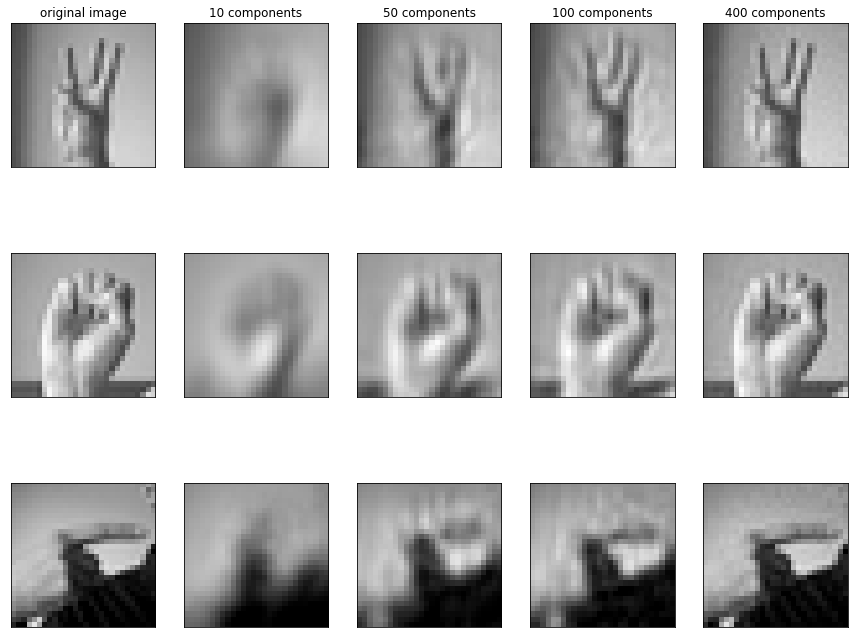

In [52]:
image_shape = images[0].shape

reduced_images = []
n_c = [10, 50, 100, 400]
for n_components in n_c:
    # build the NMF model
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    # transform the test data (afterwards has n_components many dimensions)
    X_test_pca = pca.transform(X_test)
    # back-transform the transformed test-data
    # (afterwards it's in the original space again)
    X_test_back = pca.inverse_transform(X_test_pca)
    reduced_images.append(X_test_back)

# plot the first three images in the test set:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes):
    # plot original image
    ax[0].imshow(X_test[i].reshape(image_shape),
                 vmin=0, vmax=1, cmap='gray')
    # plot the four back-transformed images
    for a, X_test_back in zip(ax[1:], reduced_images):
        a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1, cmap='gray')

# label the top row
axes[0, 0].set_title("original image")
for ax, n_components in zip(axes[0, 1:], n_c):
    ax.set_title("%d components" % n_components)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

tic = time.perf_counter()

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

# y_knn_pred = knn_model.predict(X_test)

print("KNN, n = 5")
print("Training set score: {:.3f}".format(knn_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn_model.score(X_test, y_test)))

toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")


KNN, n = 5
Training set score: 0.999
Test set score: 0.995
Time taken: 69.854 seconds


In [44]:
from sklearn.linear_model import LogisticRegression


In [46]:

tic = time.perf_counter()
# Create model
ovr_model = LogisticRegression(multi_class="ovr", solver="liblinear", C=10)

# Train model
ovr_model.fit(X_train, y_train)

# Evaluate
print("OVR")
print("Training set score: {:.3f}".format(ovr_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ovr_model.score(X_test, y_test)))
toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")


OVR
Training set score: 1.000
Test set score: 1.000
Time taken: 121.814 seconds


In [45]:
tic = time.perf_counter()
softmax_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

softmax_model.fit(X_train, y_train)

print("Softmax")
print("Training set score: {:.3f}".format(softmax_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(softmax_model.score(X_test, y_test)))
toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")

Softmax
Training set score: 1.000
Test set score: 1.000
Time taken: 8.919 seconds


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [9]:
from sklearn import svm

tic = time.perf_counter()

svm_model = svm.SVC(kernel='linear', C=1.0)

svm_model.fit(X_train, y_train)

print("SVM")
print("Training set score: {:.3f}".format(svm_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_model.score(X_test, y_test)))

toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")

SVM
Training set score: 1.000
Test set score: 0.786
Time taken: 129.154 seconds


In [19]:
from sklearn.mixture import GaussianMixture

tic = time.perf_counter()

gm_model = GaussianMixture(n_components=24)

gm_model.fit(X_train, y_train)

print("GMM")
print("Training set score: {:.3f}".format(gm_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gm_model.score(X_test, y_test)))

toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")

GMM
Training set score: 3397.801
Test set score: -137299.337
Time taken: 260.998 seconds


In [21]:
from sklearn.neural_network import MLPClassifier

tic = time.perf_counter()
mlp = MLPClassifier(solver='adam', random_state=0, hidden_layer_sizes=[100, 100, 100, 100, 100], alpha=0.000000000001)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")

Accuracy on training set: 0.997
Accuracy on test set: 0.724


In [ ]:
# Bad actor letters

tally = []

